In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

/Users/John/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
df = pd.read_csv('data/train.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [27]:
X = df.drop(columns=['Name','RescuerID','Description','PetID','AdoptionSpeed'])
y = df['AdoptionSpeed'].astype('str')

In [28]:
sclr = StandardScaler()
scld_X = sclr.fit_transform(X)

In [29]:
X_train, X_val, y_train, y_val = train_test_split(scld_X, y, test_size=0.2)

In [30]:
log = LogisticRegression(multi_class='ovr')
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
log_pred = log.predict(X_val)
np.sum(log_pred==y_val) / len(y_val)

0.33944648216072026

In [36]:
maxes = log.coef_.argmax(axis=1)

In [35]:
mins = log.coef_.argmin(axis=1)

In [37]:
X.columns[maxes]

Index(['FurLength', 'FurLength', 'Vaccinated', 'PhotoAmt', 'Breed1'], dtype='object')

In [38]:
X.columns[mins]

Index(['Quantity', 'Age', 'Age', 'Type', 'PhotoAmt'], dtype='object')

In [9]:
gb = GradientBoostingClassifier(subsample=0.9)
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.9, verbose=0,
              warm_start=False)

In [10]:
gb_pred = gb.predict(X_val)
np.sum(gb_pred==y_val) / len(y_val)

0.40480160053351116

In [11]:
enc = OneHotEncoder()
y_train_enc = enc.fit_transform(y_train.reshape(-1,1))

/Users/John/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [27]:
nn = Sequential()
nn.add(Dense(64, activation='relu', input_dim=(X_train.shape[1])))
nn.add(Dropout(0.5))
nn.add(Dense(128, activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(32, activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(5,activation='sigmoid'))

In [28]:
nn.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [29]:
nn.fit(X_train, y_train_enc, epochs=20)

Epoch 1/20
11994/11994 [==============================] - 1s 117us/step - loss: 1.5094 - acc: 0.2710
Epoch 2/20
11994/11994 [==============================] - 1s 67us/step - loss: 1.4769 - acc: 0.2926
Epoch 3/20
11994/11994 [==============================] - 1s 67us/step - loss: 1.4624 - acc: 0.3092
Epoch 4/20
11994/11994 [==============================] - 1s 67us/step - loss: 1.4545 - acc: 0.3217
Epoch 5/20
11994/11994 [==============================] - 1s 67us/step - loss: 1.4455 - acc: 0.3230
Epoch 6/20
11994/11994 [==============================] - 1s 66us/step - loss: 1.4379 - acc: 0.3327
Epoch 7/20
11994/11994 [==============================] - 1s 67us/step - loss: 1.4316 - acc: 0.3419
Epoch 8/20
11994/11994 [==============================] - 1s 68us/step - loss: 1.4271 - acc: 0.3458
Epoch 9/20
11994/11994 [==============================] - 1s 67us/step - loss: 1.4241 - acc: 0.3461
Epoch 10/20
11994/11994 [==============================] - 1s 68us/step - loss: 1.4165 - acc: 0.355

In [49]:
nn_pred = nn.predict(X_val)
np.sum(enc.inverse_transform(nn_pred)==y_val) / len(y_val)

AttributeError: 'OneHotEncoder' object has no attribute 'inverse_transform'

In [50]:
enc.inverse_transform(nn_pred)

AttributeError: 'OneHotEncoder' object has no attribute 'inverse_transform'

In [46]:
df4 = df[df.AdoptionSpeed==4]
df0 = df[df.AdoptionSpeed==0]

In [52]:
df4.Description.values[0:5]

array(['Very manja and gentle stray cat found, we would really like to find a home for it because we cannot keep her for ourselves for long. Has a very cute high pitch but soft meow. Please contact me if you would be interested in adopting.',
       "We moved out of our apartment to a landed home and there were many friendly strays in the neighbourhood. My grandma's neighbour was moving homes and was looking for a home for their pet.I pleaded with my mom to let us adopt him and he's fun-loving, he plays football and is a great goalie yet a loyal guardog. Now we are moving abroad and Max has no home.",
       'shes active... she can obey wht command that u told her.. example shakeshand . sleep and eat .. command in english n tamil :).. she will bark if thr suspicius ppl... good for guard act like a male dog..she will sleept in mattres or cradle..whn she eat u can even touch her...we let her because no time to care she... so anyybody intrested to addopt plss call to.. im Mr.Tom..thx petf

In [71]:
pd.options.display.max_rows = 1000
breeds = df[(df.Type==1)&(df.Breed1!=307)].groupby('Breed1')['Type'].count().reset_index()

In [75]:
top_breeds = breeds[breeds['Type']>100]['Breed1'].values

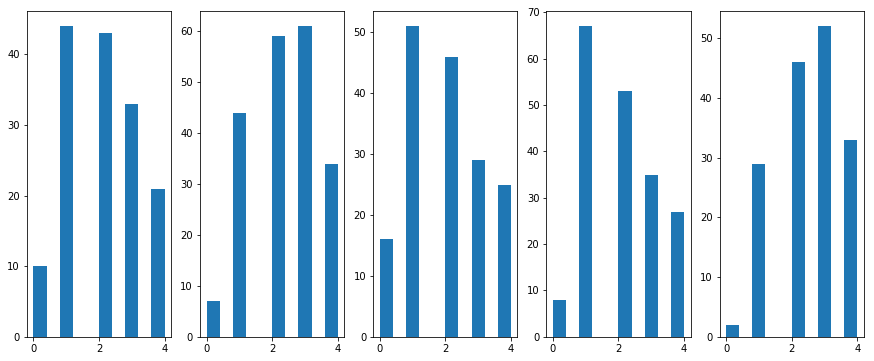

In [92]:
fig, ax = plt.subplots(1,5,figsize=(15,6))
for i in range(len(top_breeds)):
    data = df[df['Breed1']==top_breeds[i]]
    ax.flatten()[i].hist(data['AdoptionSpeed'])
    

In [ ]:
i